In [7]:
import matplotlib.pyplot as plt
import numpy as np
import json

In [37]:

with open("hyperanalysis.json", 'r') as f:
    jsonData = json.load(f)

eigenvectors_range = np.arange(0, 21, 2)
anchor_nodes_range = np.arange(0, 11, 1)

# Create some sample 2D data
data = np.zeros((11, 11), dtype=np.float32)

def findEpoch(accuracies):
    for i, v in enumerate(accuracies):
        if v > .90:
            return i
    
    return -1

for i in jsonData:
    data[i["anchorNodes"]][i["eigenvectors"]//2] = findEpoch(i["testAcc"])

dmax = np.max(data)
data = np.where(data == -1, dmax + 1, data)

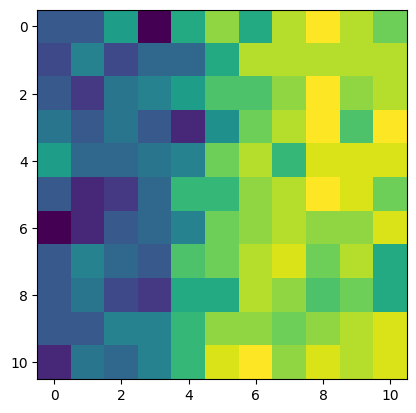

In [33]:
fig, ax = plt.subplots()
im = ax.imshow(data)

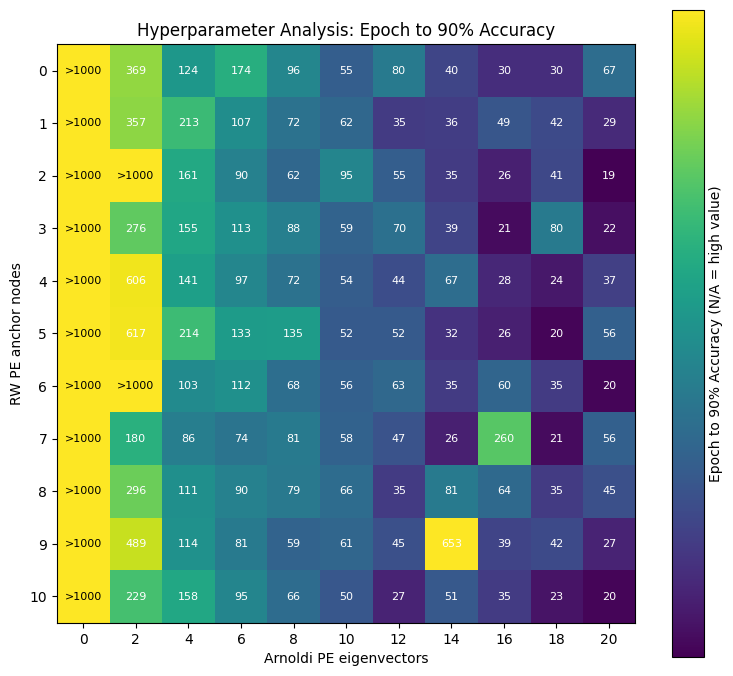

In [53]:
fig, ax = plt.subplots(figsize=(8, 7))

# Use a reversed colormap so high values (like dmax+1) are light
im = ax.imshow(np.log(data), cmap="viridis")

# Set the ticks and labels
ax.set_xticks(np.arange(len(eigenvectors_range)))
ax.set_xticklabels(eigenvectors_range)
ax.set_yticks(np.arange(len(anchor_nodes_range)))
ax.set_yticklabels(anchor_nodes_range)

# Add axis labels
ax.set_xlabel("Arnoldi PE eigenvectors")
ax.set_ylabel("RW PE anchor nodes")

# Loop over data to create text annotations
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        val = data[i, j]
        # Format the value, using "N/A" for the replaced -1s
        text_label = f"{int(val)}" if val != dmax + 1 else ">1000"
        # Use black text for "N/A" (on light bg) and white for data (on dark bg)
        color = "k" if val == dmax + 1 else "w"
        ax.text(j, i, text_label, ha="center", va="center", color=color, fontsize=8)

# Add colorbar
cbar = fig.colorbar(im, ax=ax)
cbar.set_label("Epoch to 90% Accuracy (N/A = high value)")

# Remove the label from the colorbar
cbar.set_ticks([])


ax.set_title("Hyperparameter Analysis: Epoch to 90% Accuracy")
fig.tight_layout()
plt.show()